<h1>Predicting car sales based on their mileages, model years and prices<h1>

In [1]:
import pandas as pd

data = pd.read_csv('data/car-prices.csv')
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
# Converting yes = 1 and no = 0
change = {
    'yes': 1,
    'no' : 0
}

data['sold'] = data.sold.map(change)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


Now we're going to use the model year to get the car's age. This is important because the difference between years (like 1998 and 2000) can be as tiny as 0.1%, so it's best for us to use the car's age instead because the magnitude of the difference will be much larger, hence much easier for our model to make accurate predictions

In [3]:
from datetime import datetime

current_year = datetime.today().year
data['models_age'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,models_age
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [4]:
# I prefer using kilometers
data['km_per_year'] = data.mileage_per_year * 1.60934
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,models_age,km_per_year
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [5]:
# Now let's get rid of the unwanted columns
data = data.drop(columns = ["Unnamed: 0", "mileage_per_year", "model_year"], axis = 1)
data.head()

,price,sold,models_age,km_per_year
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = data[['price', 'models_age', 'km_per_year']]
y = data['sold']

SEED = 10
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("We will train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100

print("The model's accuracy was %.2f%%" % accuracy)




We will train with 7500 elements and test with 2500 elements
The model's accuracy was 58.00%


C:\Users\PEDRO.HECK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<h3>Dummy Classifiers<h3>

To test the accuracy of our prediction algorithm, we must compare it to dummy classifiers. It's a way to test how smart is our algorithm when we compare it to dumb ones.

In [7]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()

dummy_stratified.fit(train_x, train_y)
# This time we use the 'score' method, no longer needing to create a 'predictions' variable and then importing 'accuracy_score'
accuracy = dummy_stratified.score(test_x, test_y) * 100

print("The stratified dummy's accuracy was %.2f%%" % accuracy)


The stratified dummy's accuracy was 58.00%


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 15
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("We will train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

# Rescaling our axis
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The model's accuracy was %.2f%%" % accuracy)


We will train with 7500 elements and test with 2500 elements
The model's accuracy was 77.20%


<h3>Now, instead of using SVC, let's use a Decision Tree Classifier<h3>

These classifiers allow us to see the logic behind the classifications

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 15
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("We will train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

model = DecisionTreeClassifier(max_depth=2) # Max depth = 2 is to the graph is't stupidously big
model.fit(raw_train_x, train_y)
predictions = model.predict(raw_test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The model's accuracy was %.2f%%" % accuracy)


We will train with 7500 elements and test with 2500 elements
The model's accuracy was 76.48%


Okay, now how can we see the logic behind the classifications? By importing **export_graphviz**

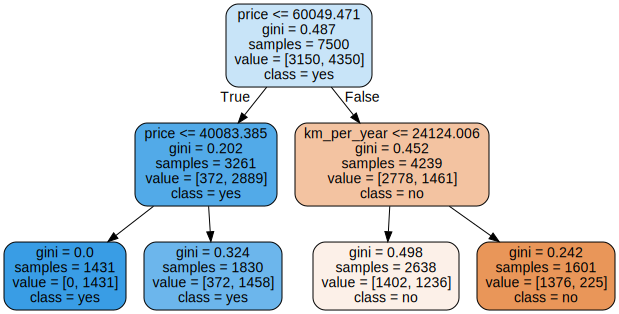

In [19]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None, filled=True, rounded=True, feature_names=x.columns, class_names=['no', 'yes'])
graph = graphviz.Source(dot_data)
graph